In [19]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [20]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [22]:
with open("sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [23]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [24]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

In [25]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [26]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [29]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 7s - loss: 0.6652 - accuracy: 0.5878 - val_loss: 0.5673 - val_accuracy: 0.7863 - 7s/epoch - 11ms/step
Epoch 2/30
625/625 - 4s - loss: 0.4177 - accuracy: 0.8359 - val_loss: 0.3831 - val_accuracy: 0.8365 - 4s/epoch - 7ms/step
Epoch 3/30
625/625 - 4s - loss: 0.3064 - accuracy: 0.8777 - val_loss: 0.3630 - val_accuracy: 0.8368 - 4s/epoch - 7ms/step
Epoch 4/30
625/625 - 5s - loss: 0.2560 - accuracy: 0.8996 - val_loss: 0.3461 - val_accuracy: 0.8521 - 5s/epoch - 7ms/step
Epoch 5/30
625/625 - 4s - loss: 0.2206 - accuracy: 0.9134 - val_loss: 0.3436 - val_accuracy: 0.8566 - 4s/epoch - 7ms/step
Epoch 6/30
625/625 - 4s - loss: 0.1946 - accuracy: 0.9263 - val_loss: 0.3579 - val_accuracy: 0.8541 - 4s/epoch - 7ms/step
Epoch 7/30
625/625 - 4s - loss: 0.1727 - accuracy: 0.9334 - val_loss: 0.3646 - val_accuracy: 0.8533 - 4s/epoch - 6ms/step
Epoch 8/30
625/625 - 4s - loss: 0.1542 - accuracy: 0.9431 - val_loss: 0.3817 - val_accuracy: 0.8498 - 4s/epoch - 6ms/step
Epoch 9/30
625/625 - 4s

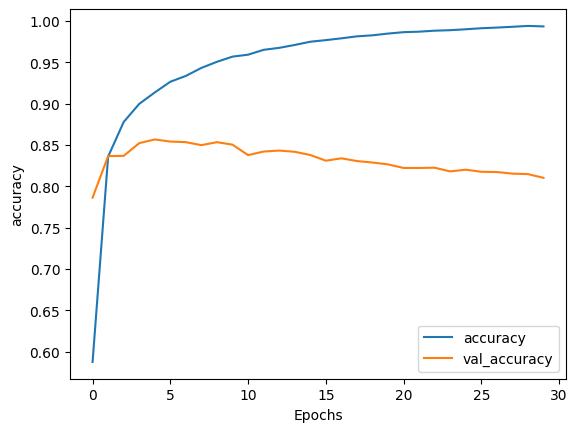

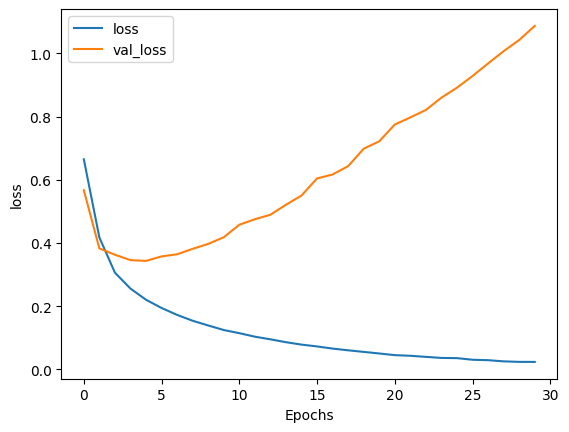

In [30]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")